<a href="https://colab.research.google.com/github/Hironobu-Kawaguchi/dlb2018_team1/blob/master/Hironobu-Kawaguchi/hkcolab_StyleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StyleGAN by Google Colaboratory

## git clone StyleGAN

In [1]:
cd /content

/content


In [2]:
!git clone https://github.com/NVlabs/stylegan

fatal: destination path 'stylegan' already exists and is not an empty directory.


## Change Directory to StyleGAN

In [3]:
cd stylegan/

/content/stylegan


In [4]:
ls

cache/            generate_figures.py*    __pycache__/     stylegan-teaser.png*
config.py*        LICENSE.txt*            README.md*       training/
dataset_tool.py*  metrics/                results/         train.py*
dnnlib/           pretrained_example.py*  run_metrics.py*


## StyleGAN pretrained_example.py

In [5]:
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# This work is licensed under the Creative Commons Attribution-NonCommercial
# 4.0 International License. To view a copy of this license, visit
# http://creativecommons.org/licenses/by-nc/4.0/ or send a letter to
# Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

"""Minimal script for generating an image using pre-trained StyleGAN generator."""

import os
import pickle
import numpy as np
import PIL.Image
import dnnlib
import dnnlib.tflib as tflib
import config

def main():
    # Initialize TensorFlow.
    tflib.init_tf()

    # Load pre-trained network.
    #url = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ' # karras2019stylegan-ffhq-1024x1024.pkl official
    url = 'https://drive.google.com/uc?id=1ALJ7DfEkQTq8_GEkgETo0Jim6Ncgnfcb' # karras2019stylegan-ffhq-1024x1024.pkl hironobu-kawaguchi
    with dnnlib.util.open_url(url, cache_dir=config.cache_dir) as f:
        _G, _D, Gs = pickle.load(f)
        # _G = Instantaneous snapshot of the generator. Mainly useful for resuming a previous training run.
        # _D = Instantaneous snapshot of the discriminator. Mainly useful for resuming a previous training run.
        # Gs = Long-term average of the generator. Yields higher-quality results than the instantaneous snapshot.

    # Print network details.
    Gs.print_layers()

    # Pick latent vector.
    rnd = np.random.RandomState(5)
    latents = rnd.randn(1, Gs.input_shape[1])

    # Generate image.
    fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
    images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)

    # Save image.
    os.makedirs(config.result_dir, exist_ok=True)
    png_filename = os.path.join(config.result_dir, 'example.png')
    PIL.Image.fromarray(images[0], 'RGB').save(png_filename)

if __name__ == "__main__":
    main()

Instructions for updating:
Colocations handled automatically by placer.

Gs                              Params    OutputShape          WeightShape     
---                             ---       ---                  ---             
latents_in                      -         (?, 512)             -               
labels_in                       -         (?, 0)               -               
lod                             -         ()                   -               
dlatent_avg                     -         (512,)               -               
G_mapping/latents_in            -         (?, 512)             -               
G_mapping/labels_in             -         (?, 0)               -               
G_mapping/PixelNorm             -         (?, 512)             -               
G_mapping/Dense0                262656    (?, 512)             (512, 512)      
G_mapping/Dense1                262656    (?, 512)             (512, 512)      
G_mapping/Dense2                262656    (?, 5

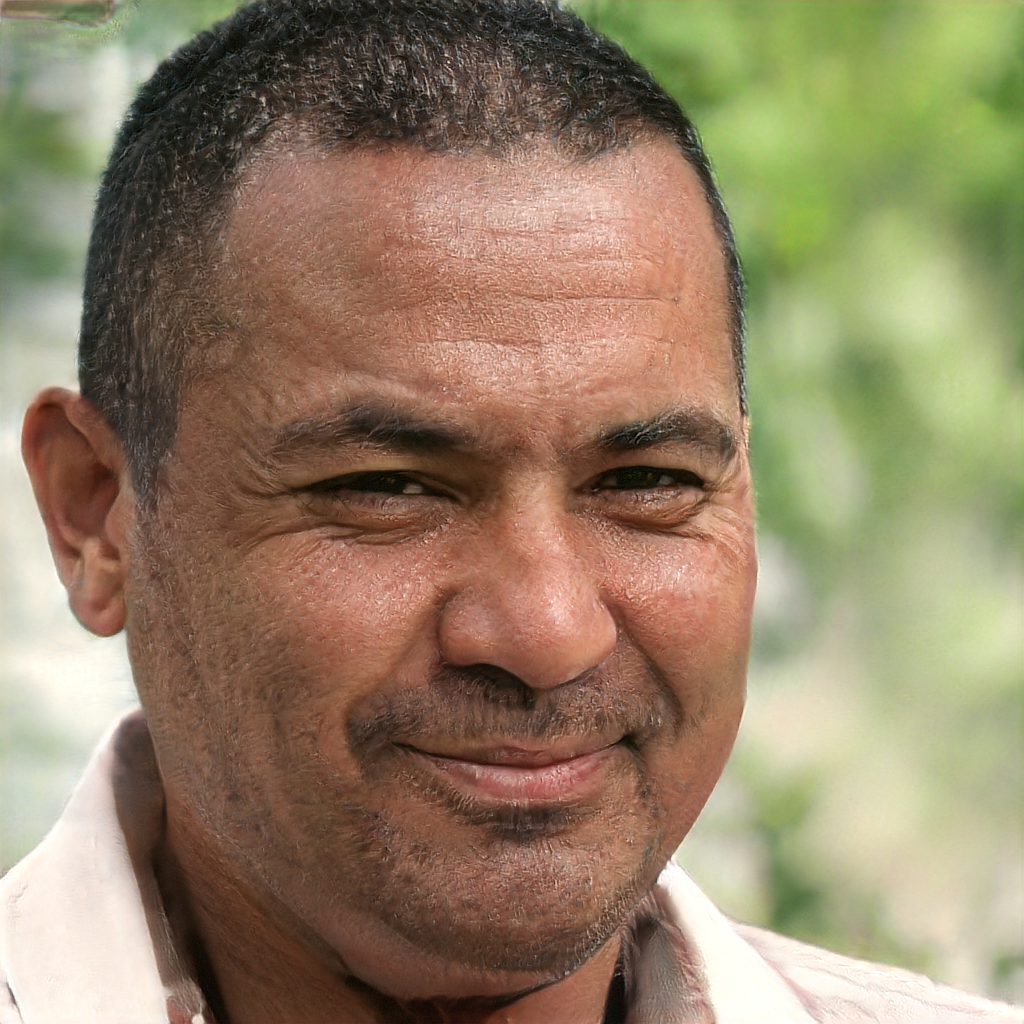

In [6]:
png_f = 'example.png'
PIL.Image.open(os.path.join(config.result_dir, png_f))

## draw style mixing figure StyleGAN by pretrained model karras2019stylegan-ffhq-1024x1024.pkl

実行はできるが、ファイルサイズが大きすぎて、表示やダウンロードできない

In [7]:
import os
from generate_figures import *

url_ffhq = 'https://drive.google.com/uc?id=1ALJ7DfEkQTq8_GEkgETo0Jim6Ncgnfcb' # karras2019stylegan-ffhq-1024x1024.pkl hironobu-kawaguchi
png_f = 'hktest01-style-mixing.png'

tflib.init_tf()
os.makedirs(config.result_dir, exist_ok=True)
draw_style_mixing_figure(os.path.join(config.result_dir, png_f), load_Gs(url_ffhq), w=1024, h=1024, src_seeds=[5,1967,1555,91,388], dst_seeds=[888,829,1898,1733,1614,845], style_ranges=[range(0,4)]*3+[range(4,8)]*2+[range(8,18)])

results/hktest01-style-mixing.png


In [0]:
#PIL.Image.open(os.path.join(config.result_dir, png_f))

In [9]:
ls cache

0ab3e07dde1dcc92dae90bd6a8175219_263e666dc20e26dcbfa514733c1d1f81_karras2019stylegan-ffhq-1024x1024.pkl
57564d5d71520697a2db90eb0b218233_https___drive.google.com_open_id_1ALJ7DfEkQTq8_GEkgETo0Jim6Ncgnfcb
91306105134c088b5612fa7d192ccf68_https___drive.google.com_file_d_1ALJ7DfEkQTq8_GEkgETo0Jim6Ncgnfcb_view_usp_sharing
bbfb4da72e838c91eaf6d9116e5f4f3f_https___1drv.ms_u_s_AvHteFLdGh-DuPJGHhRusNL7zudUPw


In [10]:
ls results

example.png  hktest01-style-mixing.png


In [12]:
from google.colab import files
files.download(os.path.join(config.result_dir, png_f))

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 47644, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 721, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
PIL.Image.open(os.path.join(config.result_dir, png_f))